In [ ]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
from fastbook import *
from fastai.vision.widgets import *

# Mushrooms

> [mushroom kaggle data](https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images?resource=download)

In [ ]:
# get data from kaggle
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/maysee/mushrooms-classification-common-genuss-images?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alienflip
Your Kaggle Key: ··········


100%|██████████| 1.85G/1.85G [00:14<00:00, 135MB/s]


In [ ]:
!ls mushrooms-classification-common-genuss-images/mushrooms/Mushrooms

Agaricus  Boletus      Entoloma   Lactarius  Russula
Amanita   Cortinarius  Hygrocybe  Psilocybe  Suillus


In [ ]:
!ls mushrooms-classification-common-genuss-images/mushrooms/Mushrooms/Suillus

000_o5wtwaqK-UE.jpg  115_SzCJgMPqi1U.jpg  225_rtRUTxzRy58.jpg
001_NUB78aw261Y.jpg  116_cRgq_ubzfpU.jpg  226_lml5VkuVw7Q.jpg
002__QuxTmpPRBQ.jpg  118_KYj0LaKoQ9A.jpg  228_LjjB-u2A1pU.jpg
003_kQDCyDHB9-Y.jpg  119_9quXYTxTjAg.jpg  229_njCv13TKL3Y.jpg
004_LMWP6X0bx7g.jpg  120_d7vmjuzeeEc.jpg  230_hv-sEuVlIhA.jpg
005_4zrEN39EHeU.jpg  121_jdwbLwMZiL8.jpg  231__NpqweN7EqA.jpg
006_8Su_kJ43Mho.jpg  122_tSt61lHG7no.jpg  232_61OFXoAf3YU.jpg
008_qBOs_2DBuJ4.jpg  123_CK6TqHiLN8s.jpg  233_e1268P87fjA.jpg
009_KY8mbwgTF74.jpg  124_A3Rr6EGcEuc.jpg  234_u62IQLniFzc.jpg
010_Dm4XhIrCgr8.jpg  125_svAO6QAdFlU.jpg  235_2srF1Z370Io.jpg
011_I_SwyEGm5xA.jpg  126_Hoh58IxH-dw.jpg  236_6FKemLDLvr8.jpg
012_LoI9mTyYf7I.jpg  127_BTkhKYF7n8E.jpg  237__uqQnT2iQEc.jpg
013_SzBeuYLeWzY.jpg  128_OO-DcZ18u-g.jpg  238_VbDcbX7aZR0.jpg
014_aBvSfmxHtqo.jpg  129_mzuRP3D4iN0.jpg  239_pLvnF05ewak.jpg
015_KmsSkCXfCek.jpg  130_6mryFKA0nrc.jpg  240_UqsAl7VoOh4.jpg
016_SbDGM4QHM9g.jpg  131__wpsJzbZG9U.jpg  241_npdpNh53tMk.jpg
017_OpHH

In [ ]:
# import cubensis images into program
! git clone https://github.com/alienflip/fast.ai-Course

Cloning into 'fast.ai-Course'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 82 (delta 12), reused 82 (delta 12), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [ ]:
! mv fast.ai-Course/Psilocybe/ mushrooms-classification-common-genuss-images/mushrooms/Mushrooms

In [ ]:

# load data paths into program
images_path = "mushrooms-classification-common-genuss-images/mushrooms/Mushrooms/"
Root = Path(images_path)
Agaricus = Path(images_path + "Agaricus")
Boletus = Path(images_path + "Boletus")
Entoloma = Path(images_path + "Entoloma")
Lactarius = Path(images_path + "Lactarius")
Suillus = Path(images_path + "Suillus")
Amanita = Path(images_path + "Amanita")
Cortinarius = Path(images_path + "Cortinarius")
Hygrocybe = Path(images_path + "Hygrocybe")
Russula = Path(images_path + "Russula")
Psilocybe = Path(images_path + "Psilocybe")

In [ ]:
# DataLoaders is a thin class that just stores whatever DataLoader objects you pass to it, and makes them available as train and valid. 
# Although it's a very simple class, it's very important in fastai: it provides the data for your model. 
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
mushroom_images = DataBlock(
    # independent/dependent variables: specifies that we are categorising image blocks
    blocks=(ImageBlock, CategoryBlock), 
    # gets images of mushrooms
    get_items=get_image_files, 
    # training/validation set ratio, make sure it is the same set each time
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    # parent_label is a function provided by fastai that simply gets the name of the folder a file is in.
    get_y=parent_label,
    # make all images the same size
    item_tfms=Resize(128))

In [ ]:
# this is a template for creating the dataloaders, which provides batches of data to the GPU
dls = mushroom_images.dataloaders(Root)

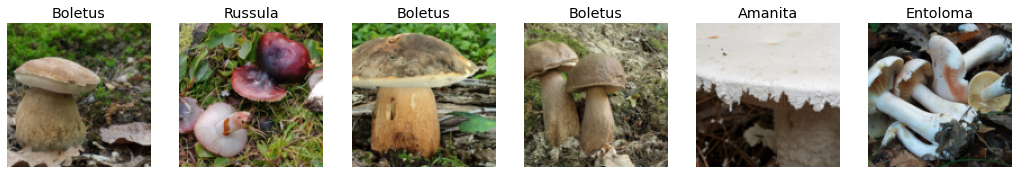

In [ ]:
# look at a few of the items on a dataloader
dls.valid.show_batch(max_n=6, nrows=1)

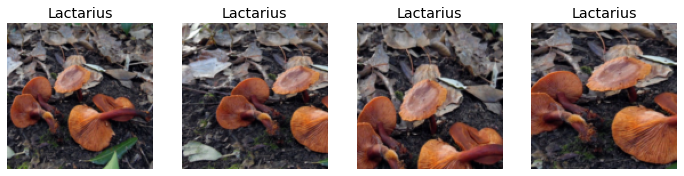

In [ ]:
# choose random part of image to crop
shrooms = mushroom_images.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = shrooms.dataloaders(Root)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

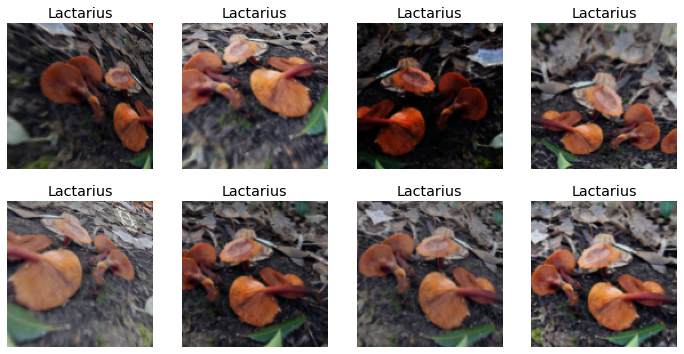

In [ ]:
# data augmentation: change values of input data, without changing the meaning of the data
# Examples: rotation, flipping, perspective warping, brightness changes and contrast changes
shrooms = mushroom_images.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = shrooms.dataloaders(Root)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
# train classifier
shrooms = mushroom_images.new(
    # transforms data to 224x224 images
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    # transforms augmentation is default
    batch_tfms=aug_transforms())
dls = shrooms.dataloaders(Root)

In [ ]:
# allows for trucated images to be processed
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# define learner and fine-tuner; then train for 3 epochs!
# remember to enable GPU runtime processingfor this task!
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.022988,1.023813,0.333827,01:22


epoch,train_loss,valid_loss,error_rate,time
0,1.086583,0.856514,0.263508,01:23
1,0.738915,0.551731,0.176166,01:23
2,0.471994,0.487726,0.154700,01:22


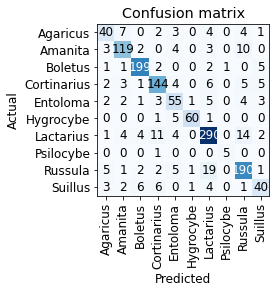

In [ ]:
# check to see where model makes mistakes: the deeper the colour, the more mistakes
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

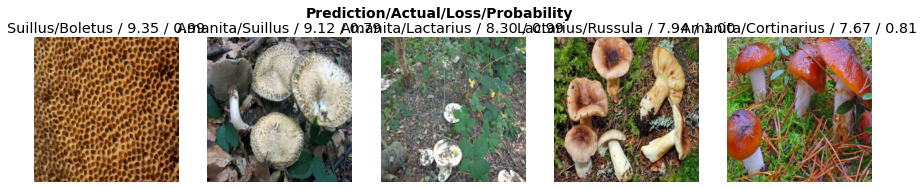

In [ ]:
# further inspect mistakes, and see if ther
interp.plot_top_losses(5, nrows=1)

In [ ]:
# export model for inference (application ready binary)
learn.export()

In [ ]:
# looks for output file
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
# get the model
learn_inf = load_learner(path/'export.pkl')

In [ ]:
# feed new image to model and return results
out = learn_inf.predict('mushrooms-classification-common-genuss-images/mushrooms/Mushrooms/Suillus/327_3y9DvrOQADw.jpg')
out

('Boletus',
 TensorBase(2),
 TensorBase([9.7624e-05, 7.3832e-07, 5.4228e-01, 2.3275e-04, 5.1596e-06, 3.5535e-04, 4.8294e-04, 3.4449e-04, 1.1775e-03, 4.5502e-01]))